## Dimensionality Reduction


In [2]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from collections import defaultdict
from sklearn import tree
from IPython.display import Image
from sklearn.tree import export_graphviz
from sklearn.model_selection import train_test_split, cross_val_score 
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn import tree
from IPython.display import Image
from sklearn.decomposition import PCA

In [3]:
X_train = pd.read_csv("/Users/salvu/Desktop/DM2Git/1Modulo/X_train.txt", header=None,  delim_whitespace=True)
y_train = pd.read_csv("/Users/salvu/Desktop/DM2Git/1Modulo/y_train.txt", header=None, delim_whitespace=True )
X_test = pd.read_csv("/Users/salvu/Desktop/DM2Git/1Modulo/X_test.txt", header=None, delim_whitespace=True )
y_test = pd.read_csv("/Users/salvu/Desktop/DM2Git/1Modulo/y_test.txt", header=None, delim_whitespace=True )
features = pd.read_csv("/Users/salvu/Desktop/DM2Git/1Modulo/features.txt", header=None, delim_whitespace=True )
subject = pd.read_csv("/Users/salvu/Desktop/DM2Git/1Modulo/subject_train.txt", header=None, delim_whitespace=True )

In [4]:
feature = features
subjects = subject
feature.drop(0,inplace=True, axis=1)

In [5]:
#inseriamo l'intestazione al dataset
lista=[]
feat_transpa = feature.transpose()
for i in range(561):
    lista.append(feat_transpa.iloc[0][i])
X_test.columns=lista    
X_train.columns=lista

In [6]:
# eliminiamo le colonne che contengono la stima mad in quanto quasi uguale a dev.std
stringa="mad()"
for col in X_train.columns:
    if(stringa in col):
        X_train.drop(labels=col, axis=1, inplace=True)
for col in X_test.columns:
    if(stringa in col):
        X_test.drop(labels=col, axis=1, inplace=True)        

## Variance Threshold

In [7]:
from sklearn.feature_selection import VarianceThreshold

In [8]:
#storing the variance and name of variables
variance = X_train.var()
columns = X_train.columns
variance

tBodyAcc-mean()-X                       0.004937
tBodyAcc-mean()-Y                       0.001665
tBodyAcc-mean()-Z                       0.003208
tBodyAcc-std()-X                        0.201363
tBodyAcc-std()-Y                        0.252652
                                          ...   
angle(tBodyGyroMean,gravityMean)        0.370032
angle(tBodyGyroJerkMean,gravityMean)    0.228460
angle(X,gravityMean)                    0.261946
angle(Y,gravityMean)                    0.088494
angle(Z,gravityMean)                    0.077909
Length: 528, dtype: float64

In [9]:
index=np.arange(0,len(columns))
df=pd.DataFrame({'Columns': index, 'Variance': variance})
df1= df.sort_values(by='Variance', ascending=False)

In [10]:
#saving the names of variables having variance more than a threshold value
variable = [ ]
for i in range(0, len(variance)):
    if variance[i]>=0.29: #setting the threshold as 1%
        variable.append(columns[i])
len(variable)        

29

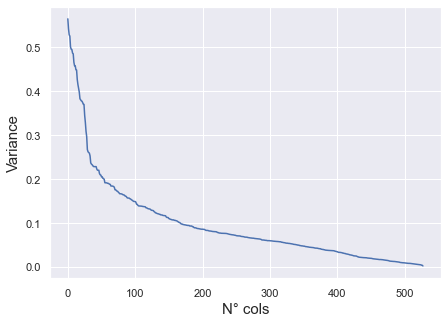

In [11]:
#Plot Variance vs Columns
sns.set(rc = {'figure.figsize':(7,5)})
p=sns.lineplot(data=df1, x=index,  y="Variance")
p.set_xlabel("N° cols", fontsize = 15)
p.set_ylabel("Variance", fontsize = 15)
plt.show()

In [12]:
sel = VarianceThreshold(threshold=(0.29)) # Valore ideale come trad-off tra accuracy e n°colonne
X_train_sel= sel.fit_transform(X_train)
X_train_sel.shape #vediamo che sputa fuori 97 colonne
ciao = pd.DataFrame(X_train_sel)
#len(X_train_sel[0][:])

In [13]:
X_test_sel = sel.transform(X_test)

clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train_sel, y_train)

y_pred = clf.predict(X_test_sel)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.8045469969460468
F1-score [0.76966292 0.7160221  0.75905119 0.75483871 0.79641256 0.99906977]
              precision    recall  f1-score   support

           1       0.72      0.83      0.77       496
           2       0.75      0.69      0.72       471
           3       0.80      0.72      0.76       420
           4       0.80      0.71      0.75       491
           5       0.76      0.83      0.80       532
           6       1.00      1.00      1.00       537

    accuracy                           0.80      2947
   macro avg       0.80      0.80      0.80      2947
weighted avg       0.81      0.80      0.80      2947



###  Accuracy vs Var_Thresh


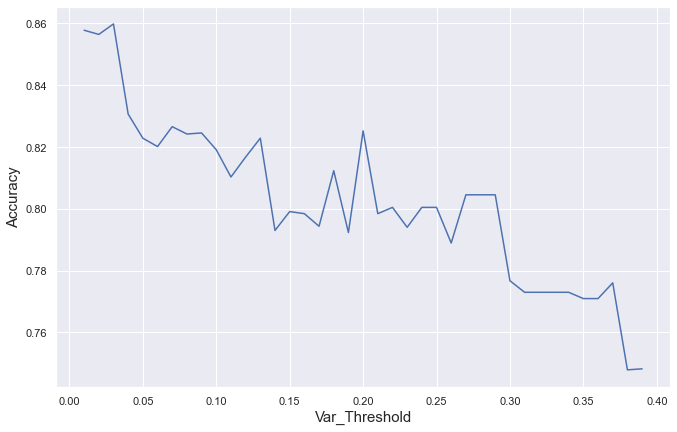

In [14]:
ind=np.arange(0.01, 0.4, 0.01)
acc=[]

for i in ind:
    sel = VarianceThreshold(threshold=(i))
    X_train_sel = sel.fit_transform(X_train)
    X_test_sel = sel.transform(X_test)
    clf = DecisionTreeClassifier(random_state=42)
    clf.fit(X_train_sel, y_train)
    y_pred = clf.predict(X_test_sel)
    acc.append(accuracy_score(y_test, y_pred))
    
#plot
sns.set(rc = {'figure.figsize':(11,7)})
p=sns.lineplot( x=ind,  y=acc)
p.set_xlabel("Var_Threshold", fontsize = 15)
p.set_ylabel("Accuracy", fontsize = 15)
plt.show()

## Univariate Feature Selection

In [15]:
from sklearn.feature_selection import SelectKBest, f_classif 

In [16]:
sel = SelectKBest(score_func=f_classif, k=30) # scegliamo il numero di feature che desideriamo secondo lo score f_classif di ANOVA
X_train_sel = sel.fit_transform(X_train, np.ravel(y_train))

X_train_sel.shape

(7352, 30)

In [17]:
X_test_sel = sel.transform(X_test)

clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train_sel, y_train)

y_pred = clf.predict(X_test_sel)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.7980997624703088
F1-score [0.78205128 0.73972603 0.77667494 0.72690763 0.74095238 1.        ]
              precision    recall  f1-score   support

           1       0.72      0.86      0.78       496
           2       0.80      0.69      0.74       471
           3       0.81      0.75      0.78       420
           4       0.72      0.74      0.73       491
           5       0.75      0.73      0.74       532
           6       1.00      1.00      1.00       537

    accuracy                           0.80      2947
   macro avg       0.80      0.79      0.79      2947
weighted avg       0.80      0.80      0.80      2947



### Uivariate FS with ANOVA vs N°cols

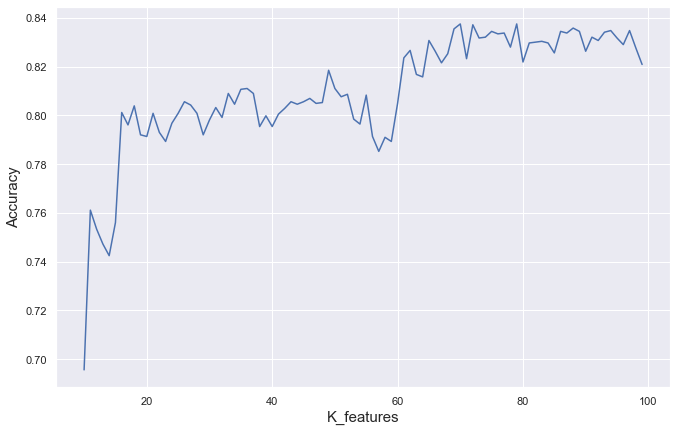

In [18]:
ind1=np.arange(10,100,1)
acc1=[]
for i in ind1:
    sel = SelectKBest(score_func=f_classif, k=i) 
    X_train_sel = sel.fit_transform(X_train, np.ravel(y_train))
    X_test_sel = sel.transform(X_test)
    clf1 = DecisionTreeClassifier(random_state=42)
    clf1.fit(X_train_sel, y_train)
    y_pred = clf1.predict(X_test_sel)
    acc1.append(accuracy_score(y_test, y_pred))
    
sns.set(rc = {'figure.figsize':(11,7)})
p=sns.lineplot( x=ind1,  y=acc1)
p.set_xlabel("K_features", fontsize = 15)
p.set_ylabel("Accuracy", fontsize = 15)
plt.show()

## RFE SelectFromModel

In [19]:
from sklearn.feature_selection import SelectFromModel 

In [20]:
sel = SelectFromModel(DecisionTreeClassifier(max_depth=None, min_samples_split=30, min_samples_leaf=30, random_state=42)) #qui selezioniamo l'algoritmo da utilizzare
X_train_sel = sel.fit_transform(X_train, y_train)
X_train_sel.shape

(7352, 26)

In [21]:
#nome colonne salvate
features_idx = sel.get_support()
features_name = X_train.columns[features_idx]

In [22]:
# X con risultati migliori!
X_train_new = X_train[features_name]
X_test_new = X_test[features_name] 
X_test_new

,"tBodyAcc-correlation()-X,Y",tGravityAcc-max()-Y,tGravityAcc-max()-Z,tGravityAcc-min()-X,tGravityAcc-min()-Y,tGravityAcc-energy()-Y,"tGravityAcc-arCoeff()-Y,3","tGravityAcc-arCoeff()-Z,2","tBodyAccJerk-correlation()-X,Y",tBodyGyro-max()-X,...,fBodyAcc-mean()-X,fBodyAcc-max()-Y,"fBodyAccJerk-bandsEnergy3()-17,32",fBodyGyro-std()-X,fBodyGyro-iqr()-Y,fBodyGyro-maxInds-X,"fBodyGyro-bandsEnergy3()-41,48",fBodyAccMag-std(),fBodyAccMag-energy(),"angle(Y,gravityMean)"
0,0.076989,-0.279244,0.152895,0.944461,-0.262160,-0.864621,-0.780391,0.987180,-0.264860,-0.663411,...,-0.918510,-0.940137,-0.997951,-0.903263,-0.838152,-1.000000,-0.995894,-0.711074,-0.953984,0.276801
1,-0.104983,-0.304870,0.152895,0.944461,-0.262160,-0.858163,-0.737390,0.869290,-0.153197,-0.810337,...,-0.960903,-0.974357,-0.999731,-0.927051,-0.941110,-1.000000,-0.999838,-0.959746,-0.998476,0.281343
2,0.305653,-0.304870,0.139454,0.948704,-0.261661,-0.859947,-0.155203,0.440302,-0.063624,-0.873794,...,-0.991906,-0.983773,-0.999625,-0.973198,-0.984363,-1.000000,-0.999670,-0.983784,-0.999570,0.280083
3,-0.063792,-0.305101,0.136124,0.947309,-0.272916,-0.853713,-0.169368,0.303787,-0.197876,-0.873794,...,-0.993030,-0.987887,-0.999728,-0.967186,-0.989034,-1.000000,-0.999656,-0.982120,-0.999504,0.284114
4,0.235151,-0.312552,0.133541,0.946221,-0.279190,-0.843378,-0.465463,0.544317,0.086585,-0.881460,...,-0.992404,-0.972039,-0.999766,-0.974398,-0.990468,-1.000000,-0.999895,-0.978838,-0.999500,0.290722
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2942,-0.258908,-0.278442,-0.226640,0.903413,-0.272203,-0.870515,-0.716222,0.276318,-0.294837,-0.536181,...,-0.335539,-0.397114,-0.916175,-0.590484,-0.437895,-1.000000,-0.955867,-0.332141,-0.702110,0.274627
2943,-0.249325,-0.278442,-0.220590,0.903793,-0.268172,-0.872342,-0.538037,0.451176,-0.502786,-0.453271,...,-0.250424,-0.363990,-0.900992,-0.478150,-0.518769,-1.000000,-0.948814,-0.316954,-0.674032,0.273578
2944,-0.351080,-0.273818,-0.220590,0.903793,-0.268172,-0.871197,-0.559421,0.548766,-0.593716,-0.453271,...,-0.362640,-0.292071,-0.927022,-0.463566,-0.562007,-1.000000,-0.935877,-0.377240,-0.715711,0.274479
2945,-0.190791,-0.272785,-0.231517,0.909007,-0.244744,-0.884788,-0.670957,0.438785,-0.277632,-0.763286,...,-0.378365,-0.415850,-0.906019,-0.681748,-0.506136,-0.933333,-0.919191,-0.390201,-0.745225,0.264782


In [23]:
X_test_sel = sel.transform(X_test)

clf = DecisionTreeClassifier(max_depth=None, min_samples_split=30, min_samples_leaf=30, random_state=42)
clf.fit(X_train_sel, y_train)

y_pred = clf.predict(X_test_sel)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.8622327790973872
F1-score [0.89514563 0.79064588 0.79905437 0.80968097 0.84784521 1.        ]
              precision    recall  f1-score   support

           1       0.86      0.93      0.90       496
           2       0.83      0.75      0.79       471
           3       0.79      0.80      0.80       420
           4       0.88      0.75      0.81       491
           5       0.80      0.91      0.85       532
           6       1.00      1.00      1.00       537

    accuracy                           0.86      2947
   macro avg       0.86      0.86      0.86      2947
weighted avg       0.86      0.86      0.86      2947



### Alternativa con randomforest

In [24]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel

In [25]:
sel = SelectFromModel(RandomForestClassifier(), max_features=32)
X_train_sel = sel.fit_transform(X_train, np.ravel(y_train))
X_train_sel.shape

(7352, 32)

In [26]:
sel.get_support() #To see which features are important 
select_feat= X_train.columns[(sel.get_support())] 
#select_feat

In [27]:
X_test_sel = sel.transform(X_test)

clf = RandomForestClassifier(random_state=42)
clf.fit(X_train_sel, np.ravel(y_train))

y_pred = clf.predict(X_test_sel)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.8540889039701391
F1-score [0.85308057 0.81058201 0.86821705 0.78585859 0.79924242 1.        ]
              precision    recall  f1-score   support

           1       0.81      0.91      0.85       496
           2       0.81      0.81      0.81       471
           3       0.95      0.80      0.87       420
           4       0.78      0.79      0.79       491
           5       0.81      0.79      0.80       532
           6       1.00      1.00      1.00       537

    accuracy                           0.85      2947
   macro avg       0.86      0.85      0.85      2947
weighted avg       0.86      0.85      0.85      2947



## Recursive Feature Elimination 

In [28]:
from sklearn.feature_selection import RFE
clf_dt = DecisionTreeClassifier()
clf_dt

DecisionTreeClassifier()

In [29]:
rfe = RFE(estimator=clf, step=1)
rfe = rfe.fit(X_train, np.ravel(y_train))

In [30]:
selected_rfe_features = pd.DataFrame({'Feature': list(X_train.columns),
                                      'Ranking': rfe.ranking_})
selected_rfe_features.sort_values(by='Ranking')

,Feature,Ranking
527,"angle(Z,gravityMean)",1
458,"fBodyGyro-bandsEnergy2()-25,48",1
459,"fBodyGyro-bandsEnergy3()-1,8",1
234,tBodyGyroJerkMag-std(),1
461,"fBodyGyro-bandsEnergy3()-17,24",1
...,...,...
512,fBodyBodyGyroJerkMag-min(),261
24,"tBodyAcc-arCoeff()-X,3",262
359,"fBodyAccJerk-bandsEnergy1()-33,40",263
211,tBodyAccJerkMag-max(),264


In [31]:
a=np.where(selected_rfe_features.iloc[:,1]==1) # salvo in a le feature più importanti
np.count_nonzero(a) #conto quante sono

264

In [32]:
X_train_rfe = rfe.transform(X_train)
X_test_rfe = rfe.transform(X_test)

In [33]:
clf_model = clf.fit(X_train_rfe, np.ravel(y_train))

In [34]:
y_pred = clf_model.predict(X_test_rfe)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.9202578893790295
F1-score [0.92233941 0.891258   0.90794451 0.88911917 0.90101758 1.        ]
              precision    recall  f1-score   support

           1       0.88      0.97      0.92       496
           2       0.90      0.89      0.89       471
           3       0.97      0.86      0.91       420
           4       0.91      0.87      0.89       491
           5       0.89      0.92      0.90       532
           6       1.00      1.00      1.00       537

    accuracy                           0.92      2947
   macro avg       0.92      0.92      0.92      2947
weighted avg       0.92      0.92      0.92      2947



###  RFE with cross validation

In [36]:
from sklearn.feature_selection import RFECV

rfecv = RFECV(estimator=clf_dt, step=1, cv=2, scoring='accuracy')
rfecv = rfecv.fit(X_train, y_train)
print('optimal number of features:', rfecv.n_features_)
print('Best features:', X_train.columns[rfecv.support_])

optimal number of features: 133
Best features: Index(['tBodyAcc-max()-X', 'tBodyAcc-max()-Y', 'tBodyAcc-max()-Z',
       'tBodyAcc-min()-X', 'tBodyAcc-min()-Y', 'tBodyAcc-min()-Z',
       'tBodyAcc-sma()', 'tBodyAcc-energy()-X', 'tBodyAcc-energy()-Y',
       'tBodyAcc-energy()-Z',
       ...
       'fBodyAccMag-std()', 'fBodyAccMag-max()', 'fBodyAccMag-energy()',
       'fBodyBodyAccJerkMag-max()', 'fBodyBodyGyroMag-meanFreq()',
       'angle(tBodyAccJerkMean),gravityMean)',
       'angle(tBodyGyroMean,gravityMean)',
       'angle(tBodyGyroJerkMean,gravityMean)', 'angle(X,gravityMean)',
       'angle(Y,gravityMean)'],
      dtype='object', length=133)


In [37]:
var = X_train.columns[rfecv.support_]
X_train_new = X_train[var]
X_test_new = X_test[var]

In [38]:
dt = DecisionTreeClassifier()
dt1 = dt.fit(X_train_new, y_train)
y_pred = dt1.predict(X_test_new)

In [39]:
print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.8585001696640652
F1-score [0.86297376 0.8012959  0.85714286 0.79193206 0.82246377 1.        ]
              precision    recall  f1-score   support

           1       0.83      0.90      0.86       496
           2       0.82      0.79      0.80       471
           3       0.88      0.84      0.86       420
           4       0.83      0.76      0.79       491
           5       0.79      0.85      0.82       532
           6       1.00      1.00      1.00       537

    accuracy                           0.86      2947
   macro avg       0.86      0.86      0.86      2947
weighted avg       0.86      0.86      0.86      2947



In [40]:
y_pred = rfecv.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.8540889039701391
F1-score [0.85826002 0.78918919 0.85956416 0.78418803 0.81801802 1.        ]
              precision    recall  f1-score   support

           1       0.83      0.89      0.86       496
           2       0.80      0.77      0.79       471
           3       0.87      0.85      0.86       420
           4       0.82      0.75      0.78       491
           5       0.79      0.85      0.82       532
           6       1.00      1.00      1.00       537

    accuracy                           0.85      2947
   macro avg       0.85      0.85      0.85      2947
weighted avg       0.85      0.85      0.85      2947



## PCA (Principal Component Analysis)


In [41]:
from sklearn.decomposition import PCA

In [42]:
pca = PCA(n_components=26)
pca.fit(X_train)
X_train_pca = pca.transform(X_train)

In [43]:
num_components = len(pca.explained_variance_ratio_)
indx = np.arange(num_components)
values = pca.explained_variance_ratio_
cumulative = np.cumsum(values) # in questo vettore salviamo la varianza cumulata
cumulative

array([0.60247255, 0.65458954, 0.69924022, 0.71867966, 0.73578362,
       0.74913665, 0.76146858, 0.77275428, 0.7829821 , 0.79225949,
       0.80016651, 0.80727112, 0.81333491, 0.81920966, 0.82455155,
       0.82961326, 0.83460597, 0.83926483, 0.84380584, 0.84818184,
       0.85243256, 0.85647202, 0.8601856 , 0.86377919, 0.86731825,
       0.87076346])

In [44]:
#questo comando ci indica i valori in stringa del vettore! *100 serve per trasformare il valore in percetuale, mentre il secondo argomento indica quantecifre decimale ci vogliono
r"%s" % ((str(values[4] *100 ) [:3])) 

'1.7'

### Variance explained ratio for each Principal Component

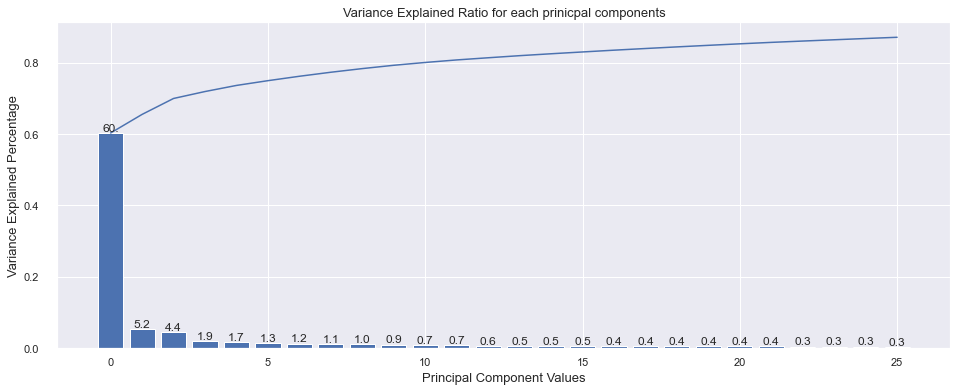

In [45]:
#PLOT Variance Explained Ratio for each prinicpal components

plt.figure(figsize=(16,6))
ax=plt.subplot(111) #pos sarebbe il primo parametro ed è composto da 3 digit, il primo per indicare il numero di righe, il secondo le colonne e il terzo l'indice del subplot


ax.bar(indx, values)
ax.plot(indx, cumulative)

#add annotation of percentage of each component to graph 
for val in range(num_components):
    ax.annotate(r"%s" % ((str(values[val] * 100) [:3])), (indx[val], values[val]),
               va= "bottom", ha= "center", fontsize= 12)
    
#setting tick parameters    
ax.xaxis.set_tick_params(width=1)
ax.yaxis.set_tick_params(width=3, length=15)
ax.set_xlabel("Principal Component Values", size=13)
ax.set_ylabel("Variance Explained Percentage", size=13)
plt.title("Variance Explained Ratio for each prinicpal components", size=13)
plt.show()

In [46]:
X_test_pca = pca.transform(X_test)

clf = DecisionTreeClassifier(min_samples_leaf=3, random_state=42)
clf.fit(X_train_pca, y_train)

y_pred = clf.predict(X_test_pca)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.8164234815066169
F1-score [0.85325559 0.79704017 0.7359199  0.73373984 0.77281192 0.97928437]
              precision    recall  f1-score   support

           1       0.82      0.89      0.85       496
           2       0.79      0.80      0.80       471
           3       0.78      0.70      0.74       420
           4       0.73      0.74      0.73       491
           5       0.77      0.78      0.77       532
           6       0.99      0.97      0.98       537

    accuracy                           0.82      2947
   macro avg       0.81      0.81      0.81      2947
weighted avg       0.82      0.82      0.82      2947



### Cumulative_explained_variance / PC

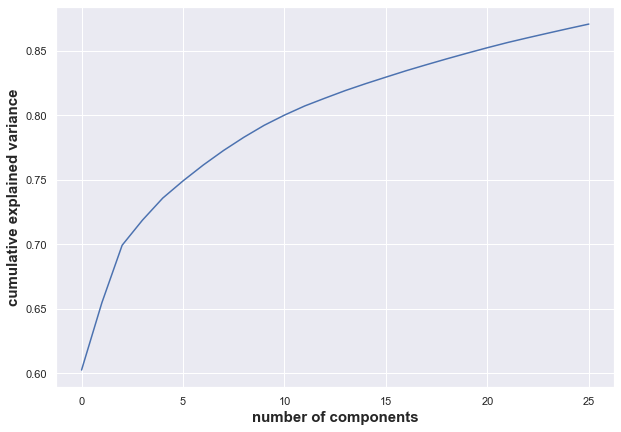

In [47]:
plt.figure(figsize=(10, 7))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components',fontsize = 15, fontweight = 'bold')
plt.ylabel('cumulative explained variance',fontsize = 15, fontweight = 'bold')
#plt.xscale("symlog")
#plt.xlim(0,200,10)
plt.show()

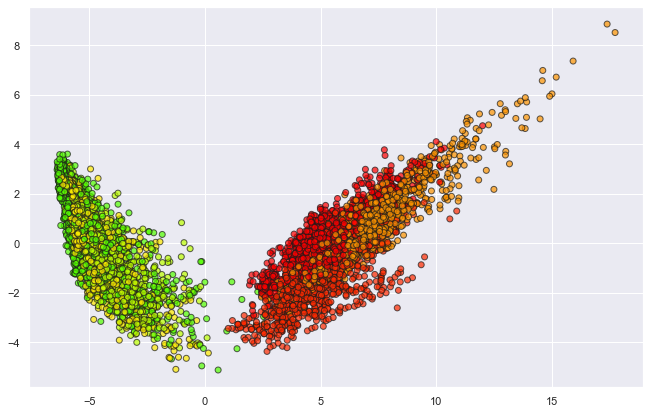

In [48]:
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap=plt.cm.prism, edgecolor='k', alpha=0.7)
plt.show()

## Visualizzazione PCA 2D

In [49]:
pca = PCA(n_components=2)
pca.fit(X_train)
X_train_pca = pca.transform(X_train)

In [50]:
pca_df = pd.DataFrame(data = X_train_pca, columns = ['pca_1', 'pca_2'])
pca_df['label'] = y_train

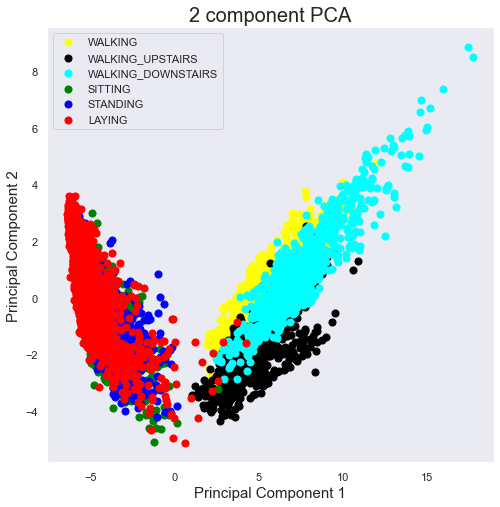

In [51]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)

target = [1,2,3,4,5,6]
class_name = ["WALKING","WALKING_UPSTAIRS", "WALKING_DOWNSTAIRS", "SITTING", "STANDING", "LAYING"]
colors=['yellow', 'black', 'cyan', 'green', 'blue', 'red']

for targets, color in zip(target,colors):
    indicesToKeep = pca_df['label'] == targets
    ax.scatter(pca_df.loc[indicesToKeep, 'pca_1']
               , pca_df.loc[indicesToKeep, 'pca_2']
               , c = color
               , s = 50)
#print((indicesToKeep))
ax.legend(class_name)
ax.grid()

## t-SNE

In [52]:
from sklearn.manifold import TSNE

In [53]:
tsne = TSNE(n_components=2)
X_train_tsne = tsne.fit_transform(X_train)
X_train_tsne.shape

c:\anaconda3n\lib\site-packages\sklearn\manifold\_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
c:\anaconda3n\lib\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


(7352, 2)

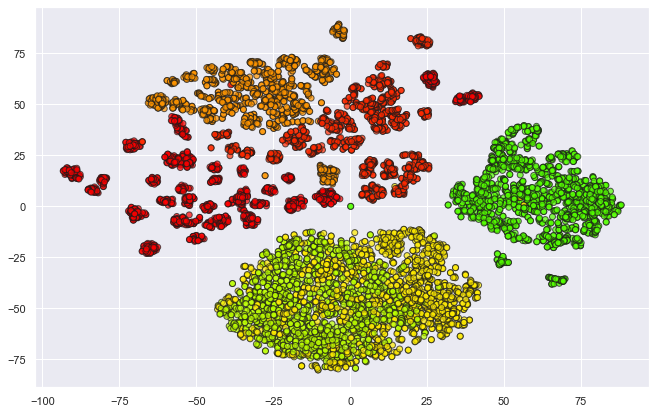

In [54]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=y_train, cmap=plt.cm.prism, edgecolor='k', alpha=0.7)
plt.show()

In [55]:
#X_test_mds = mds.transform(X_test) # no transform

clf = DecisionTreeClassifier(min_samples_leaf=3, random_state=42)
clf.fit(X_train_tsne, y_train)

y_pred = clf.predict(X_train_tsne)

print('Accuracy %s' % accuracy_score(y_train, y_pred))
print('F1-score %s' % f1_score(y_train, y_pred, average=None))
print(classification_report(y_train, y_pred))

Accuracy 0.9825897714907508
F1-score [0.99877501 0.99767334 0.9979716  0.95300462 0.95594714 0.99928927]
              precision    recall  f1-score   support

           1       1.00      1.00      1.00      1226
           2       1.00      1.00      1.00      1073
           3       1.00      1.00      1.00       986
           4       0.94      0.96      0.95      1286
           5       0.96      0.95      0.96      1374
           6       1.00      1.00      1.00      1407

    accuracy                           0.98      7352
   macro avg       0.98      0.98      0.98      7352
weighted avg       0.98      0.98      0.98      7352



### Plot al variare di Perplexity e N_Iteraz

In [56]:
# perform t-sne with different preplexities and their plots
def perform_tsne(X_data, y_data, perplexities, n_iter=300, img_name_prefix='t-sne'):
        
    for index,perplexity in enumerate(perplexities):
        # perform t-sne
        print('\nperforming tsne with perplexity {} and with {} iterations at max'.format(perplexity, n_iter))
        X_reduced = TSNE(perplexity=perplexity).fit_transform(X_data) #verbose=2
        print('Done..')
        
       # prepare the data for seaborn         
        print('Creating plot for this t-sne visualization..')
        df = pd.DataFrame({'x':X_reduced[:,0], 'y':X_reduced[:,1], 'label':y_data }) #,'label':y_data
       
       ## draw the plot in appropriate place in the grid
        sns.lmplot(data=df, x='x', y='y', hue='label',  fit_reg=False, height=7,\
                  palette="Set1") #markers=['^','v','s','o', '1','2']
        plt.title("t-Sne with perplexity : {} and max_iter : {}".format(perplexity, n_iter))
        img_name = img_name_prefix + '_perp_{}_iter_{}.png'.format(perplexity, n_iter)
        print('saving this plot as image in present working directory...')
        plt.savefig(img_name)
        plt.show()
        print('Done')

In [57]:
classe = { 1 : "WALKING" , 2 : "WALKING_UPSTAIRS", 3 : "WALKING_DOWNSTAIRS", 4 : "SITTING", 5 : "STANDING", 6 : "LAYING"}
y_train_activity = y_train[0].map(classe)


performing tsne with perplexity 20 and with 300 iterations at max


c:\anaconda3n\lib\site-packages\sklearn\manifold\_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
c:\anaconda3n\lib\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


Done..
Creating plot for this t-sne visualization..
saving this plot as image in present working directory...


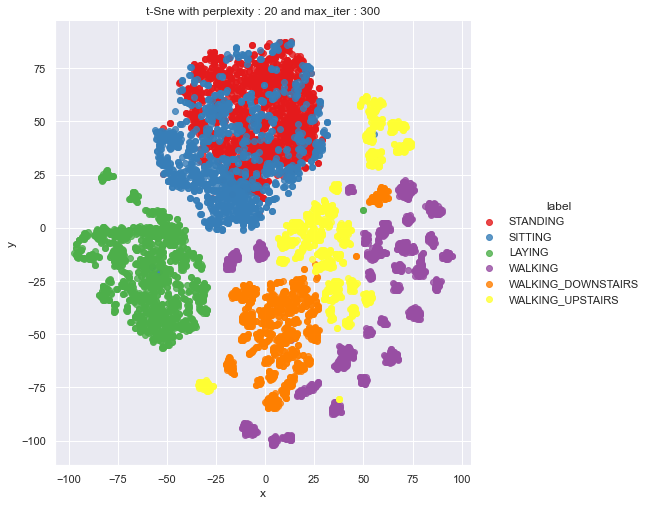

Done

performing tsne with perplexity 50 and with 300 iterations at max


c:\anaconda3n\lib\site-packages\sklearn\manifold\_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
c:\anaconda3n\lib\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


Done..
Creating plot for this t-sne visualization..
saving this plot as image in present working directory...


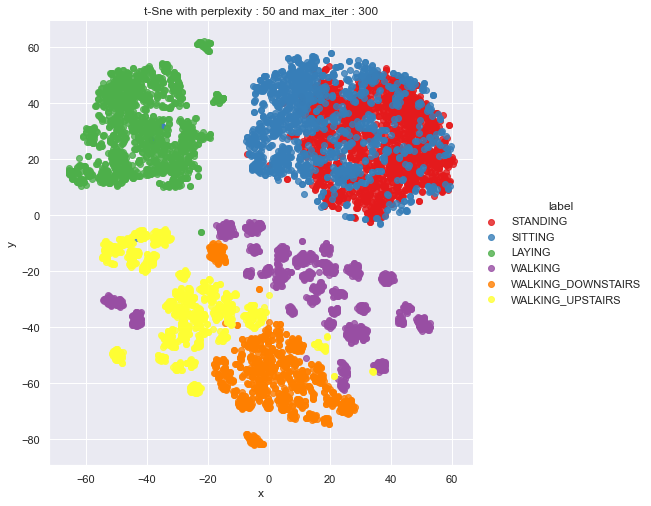

Done

performing tsne with perplexity 100 and with 300 iterations at max


c:\anaconda3n\lib\site-packages\sklearn\manifold\_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
c:\anaconda3n\lib\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


Done..
Creating plot for this t-sne visualization..
saving this plot as image in present working directory...


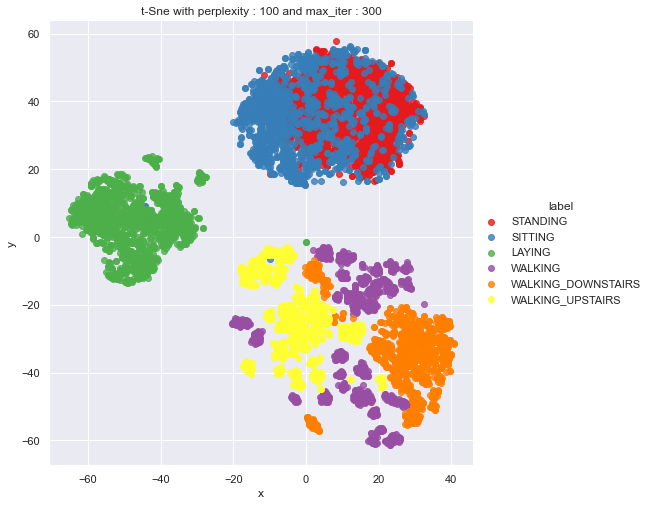

Done


In [58]:
perform_tsne(X_data = X_train ,y_data=y_train_activity, perplexities =[20,50,100])